In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import impute
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from scipy.stats import norm

In [2]:
ds = pd.read_csv("data/ChemicalManufacturingProcess.csv", index_col="id", header=0)

In [4]:
ds.describe()

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,...,171.000000,176.000000,176.000000,176.000000,175.000000,175.000000,176.000000,176.000000,176.000000,176.000000
mean,40.176534,6.411420,55.688750,67.705000,12.349261,18.598636,48.910398,100.014148,17.494773,12.850057,...,0.019573,1.013636,2.534091,6.851136,0.017714,0.023714,11.206250,0.911932,1.805114,2.138068
std,1.845666,0.713923,4.034581,4.001064,1.774661,1.844141,3.746072,0.107742,0.676954,0.415176,...,0.000874,0.445083,0.649375,1.505494,0.038289,0.053824,1.941609,0.867986,0.322006,0.406904
min,35.250000,4.580000,46.870000,56.970000,9.380000,13.240000,40.600000,100.000000,15.880000,11.440000,...,0.017000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.752500,5.977500,52.680000,64.980000,11.245000,17.235000,46.055000,100.000000,17.060000,12.602500,...,0.019000,0.700000,2.000000,7.100000,0.000000,0.000000,11.400000,0.600000,1.800000,2.100000
50%,39.970000,6.305000,55.090000,67.220000,12.100000,18.490000,48.460000,100.000000,17.510000,12.835000,...,0.020000,1.000000,3.000000,7.200000,0.000000,0.000000,11.600000,0.800000,1.900000,2.200000
75%,41.475000,6.870000,58.737500,70.427500,13.220000,19.900000,51.345000,100.000000,17.880000,13.130000,...,0.020000,1.300000,3.000000,7.300000,0.000000,0.000000,11.700000,1.025000,1.900000,2.300000
max,46.340000,8.810000,64.750000,78.250000,23.090000,24.850000,59.380000,100.830000,19.140000,14.080000,...,0.022000,2.300000,3.000000,7.500000,0.100000,0.200000,12.100000,11.000000,2.100000,2.600000


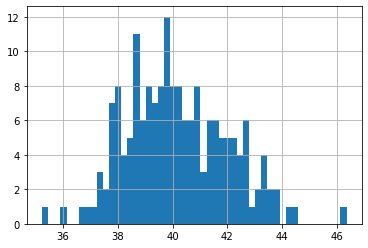

In [5]:
# Target var is relatively symmetric distribution
ds["Yield"].hist(bins=50)
plt.show()

In [7]:
ds.skew().sort_values()

ManufacturingProcess18   -12.956145
ManufacturingProcess26   -12.894782
ManufacturingProcess20   -12.856644
ManufacturingProcess25   -12.855681
ManufacturingProcess27   -12.740117
ManufacturingProcess16   -12.634774
ManufacturingProcess31   -12.033390
ManufacturingProcess29   -10.264185
ManufacturingProcess42    -5.544153
ManufacturingProcess44    -5.056214
ManufacturingProcess30    -4.840314
ManufacturingProcess39    -4.342867
ManufacturingProcess45    -4.148384
ManufacturingProcess01    -3.988296
ManufacturingProcess38    -1.710857
ManufacturingProcess02    -1.455917
ManufacturingProcess09    -0.956918
ManufacturingProcess04    -0.710062
ManufacturingProcess03    -0.489019
ManufacturingProcess28    -0.463738
BiologicalMaterial09      -0.273054
ManufacturingProcess34    -0.268136
ManufacturingProcess08    -0.220327
ManufacturingProcess35    -0.158383
ManufacturingProcess33    -0.133333
ManufacturingProcess11    -0.019665
ManufacturingProcess14    -0.011159
BiologicalMaterial03       0

In [20]:
ds["ManufacturingProcess06"].value_counts().sort_index()

203.0     1
203.6     2
204.1     3
204.3     2
204.6     2
204.8     6
205.0     5
205.2     8
205.5     8
205.7     8
205.9     6
206.2    11
206.4    12
206.6    11
206.8     8
207.1     5
207.3     6
207.5     7
207.8     6
208.0     3
208.2     5
208.4     2
208.7     9
208.9     6
209.1     3
209.4     6
209.6     2
209.8     3
210.0     3
210.3     1
210.5     1
210.7     2
211.2     1
211.4     3
211.7     1
213.3     2
213.7     1
215.1     1
218.7     1
227.4     1
Name: ManufacturingProcess06, dtype: int64

In [29]:
ds["ManufacturingProcess43"].mean()

0.911931818181818

In [12]:
ds.isnull().sum()

Yield                      0
BiologicalMaterial01       0
BiologicalMaterial02       0
BiologicalMaterial03       0
BiologicalMaterial04       0
BiologicalMaterial05       0
BiologicalMaterial06       0
BiologicalMaterial07       0
BiologicalMaterial08       0
BiologicalMaterial09       0
BiologicalMaterial10       0
BiologicalMaterial11       0
BiologicalMaterial12       0
ManufacturingProcess01     1
ManufacturingProcess02     3
ManufacturingProcess03    15
ManufacturingProcess04     1
ManufacturingProcess05     1
ManufacturingProcess06     2
ManufacturingProcess07     1
ManufacturingProcess08     1
ManufacturingProcess09     0
ManufacturingProcess10     9
ManufacturingProcess11    10
ManufacturingProcess12     1
ManufacturingProcess13     0
ManufacturingProcess14     1
ManufacturingProcess15     0
ManufacturingProcess16     0
ManufacturingProcess17     0
ManufacturingProcess18     0
ManufacturingProcess19     0
ManufacturingProcess20     0
ManufacturingProcess21     0
ManufacturingP